Part 2: Qualitative Analysis
Create a presentation using Google Slides (max. 5 slides) using the data above (and additional data from those tables) that make clear recommendations on how people can create a successful Kickstarter campaign.

* **What's the ideal pledge goal?**

In [36]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from tools.helpers import read_json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 5]

In [38]:
in_csv = 'data/input/DSI_kickstarterscrape_dataset.csv'

In [39]:
df = pd.read_csv(in_csv, encoding="ISO-8859-1")
# if need to convert back to utf-8 https://stackoverflow.com/questions/42456867/convert-pandas-dataframe-to-utf8

df = df.rename(columns=lambda x: x.replace(' ', '_'))
df['uid'] = df.index + 1

In [46]:
df.head(5)

,project_id,name,url,category,subcategory,location,status,goal,pledged,funded_percentage,backers,funded_date,levels,reward_levels,updates,comments,duration,uid
0,39409,WHILE THE TREES SLEEP,http://www.kickstarter.com/projects/emiliesaba...,Film & Video,Short Film,"Columbia, MO",successful,10500.0,11545.0,1.099524,66,"Fri, 19 Aug 2011 19:28:17 -0000",7,"$25,$50,$100,$250,$500,$1,000,$2,500",10,2,30.00,1
1,126581,Educational Online Trading Card Game,http://www.kickstarter.com/projects/972789543/...,Games,Board & Card Games,"Maplewood, NJ",failed,4000.0,20.0,0.005000,2,"Mon, 02 Aug 2010 03:59:00 -0000",5,"$1,$5,$10,$25,$50",6,0,47.18,2
2,138119,STRUM,http://www.kickstarter.com/projects/185476022/...,Film & Video,Animation,"Los Angeles, CA",live,20000.0,56.0,0.002800,3,"Fri, 08 Jun 2012 00:00:31 -0000",10,"$1,$10,$25,$40,$50,$100,$250,$1,000,$1,337,$9,001",1,0,28.00,3
3,237090,GETTING OVER - One son's search to finally kno...,http://www.kickstarter.com/projects/charnick/g...,Film & Video,Documentary,"Los Angeles, CA",successful,6000.0,6535.0,1.089167,100,"Sun, 08 Apr 2012 02:14:00 -0000",13,"$1,$10,$25,$30,$50,$75,$85,$100,$110,$250,$500...",4,0,32.22,4
4,246101,The Launch of FlyeGrlRoyalty &quot;The New Nam...,http://www.kickstarter.com/projects/flyegrlroy...,Fashion,Fashion,"Novi, MI",failed,3500.0,0.0,0.000000,0,"Wed, 01 Jun 2011 15:25:39 -0000",6,"$10,$25,$50,$100,$150,$250",2,0,30.00,5


In [41]:
# filter outliers
from scipy import stats

dfs = df[['uid', 'funded_percentage', 'goal']]

dff = dfs[(np.abs(stats.zscore(dfs)) < 3).all(axis=1)]

dfm = dff.merge(df.drop(['funded_percentage', 'goal'], axis=1), how='left', on='uid')

dfs = dfm[(dfm.status == 'successful')]
dfu = dfm[(dfm.status != 'successful') & (dfm.status != 'live')]

In [42]:
dfs.goal.describe()

count     22943.000000
mean       5450.794183
std       10868.848403
min           1.000000
25%        1300.000000
50%        3000.000000
75%        6000.000000
max      500000.000000
Name: goal, dtype: float64

In [43]:
dfu.goal.describe().apply(lambda x: format(x, 'f'))

count     19041.000000
mean      13260.633631
std       30411.315493
min           0.500000
25%        2500.000000
50%        5000.000000
75%       12000.000000
max      575000.000000
Name: goal, dtype: object

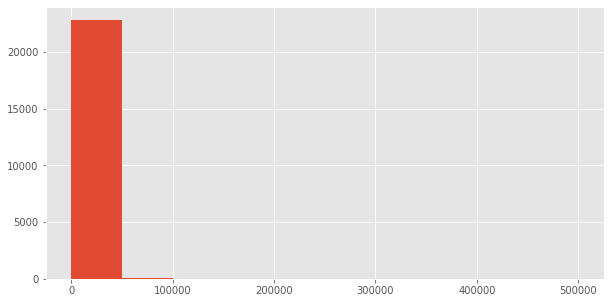

In [44]:
dfs.goal.hist(bins=10)

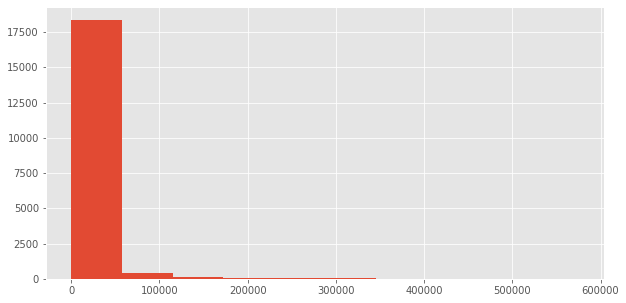

In [45]:
dfu.goal.hist(bins=10)